In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import string
import re
import nltk
import pickle
from numpy import genfromtxt
from nltk.corpus import stopwords
nltk.download('stopwords')
from unidecode import unidecode
import jpype

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\t23463int\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
headers = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.67 Safari/537.36"}
url_list = ["https://eksisozluk.com/mustafa-kemal-ataturk--34712?p=","https://eksisozluk.com/enes-batur--2825586?p=","http://eksisozluk.com/filmi-varken-gidip-500-sayfa-roman-okuyan-tip--5830909?p="]



In [3]:
pre_data = []
def get_data(url_link):
    for x in range(1,22):
        page = requests.get(url_link+"?p="+str(x),headers=headers,verify = False)
        soup = BeautifulSoup(page.content,"html.parser")
        for entry in soup.find_all("div",{"class" : "content"}):
            pre_data.append(entry.get_text())
for url in url_list:
    get_data(url)

C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Un

C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Un

C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\t23463int\Anaconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Un

In [4]:
pre_data = np.array(pre_data)
# Sentiment data is taken from csv.
y = pd.read_csv("labels63.csv",header=None,sep=",")
df = pd.DataFrame(pre_data,columns=["Comment"])
df

,Comment
0,\r\n bu cografya da dogmus olduguma sevinme...
1,"\r\n o olmasaydi biz, ""biz"" olur muyduk bil..."
2,\r\n guzel insan keza bu kadarı yeter.\r\n
3,\r\n (bkz: 10 kasim)\r\n
4,"\r\n sarı saçlı mavi gözlü yakışıklı, güzel..."
...,...
625,\r\n film ve roman hiçbir zaman örtüşmez ve...
626,\r\n aklı hayali yaratmaya yeten kişilerdir...
627,\r\n filmine ve kitabına göre değişkenlik g...
628,\r\n film izlemek ve kitap okumak ayrı ayrı...


In [5]:
jpype.startJVM(jpype.getDefaultJVMPath(),"-Djava.class.path=C:/Users/t23463int/Desktop/eksisozluk-sentiment-analysis-master/zemberek-tum-2.0.jar","-ea")
tr = jpype.JClass("net.zemberek.tr.yapi.TurkiyeTurkcesi")
tr = tr()
Zemberek = jpype.JClass("net.zemberek.erisim.Zemberek")
zemberek = Zemberek(tr)


In [6]:
WPT = nltk.WordPunctTokenizer()
# Some text processing and corpus creation.
def norm_doc(single_doc):

    single_doc = re.sub(" \d+", " ", single_doc)
    # Getting rid of the comments with links.
    single_doc = re.sub(r'^https?:\/\/.*[\r\n]*', '', single_doc, flags=re.MULTILINE)
    pattern = r"[{}]".format(",.;") 
    single_doc = re.sub(pattern, "", single_doc)
    single_doc = single_doc.lower()
    single_doc = re.sub(r'^br$', ' ', single_doc)
    single_doc = re.sub(r'\s+br\s+',' ',single_doc)
    single_doc = re.sub(r'\s+[a-z]\s+', ' ',single_doc)
    single_doc = re.sub(r'^b\s+', '', single_doc)
    single_doc = re.sub(r'\s+', ' ', single_doc)
    single_doc = re.sub(r'\s+', ' ', single_doc)
    tokens = WPT.tokenize(single_doc)
    filtered_tokens = [token for token in tokens]
    # Stemming with Zemberek.
    try:
        filtered_tokens = [zemberek.kelimeCozumle(token)[0].kok().icerik() for token in filtered_tokens if zemberek.kelimeDenetle(token) == True ]
    except Exception as e:
        print(e)
    str_filtered_tokens = [str(i) for i in filtered_tokens]
    single_doc = ' '.join(str_filtered_tokens)
    return single_doc
norm_docs = np.vectorize(norm_doc)
corpus = norm_docs(pre_data)

In [7]:

df = pd.DataFrame(corpus,columns=["Comment"])
df["Sentiment"] = y
# Clean empty entries.
df = df[df["Comment"]!= ""]
df.head(10)



,Comment,Sentiment
0,bu da sevin için bir kaç neden biri,4
1,biz biz ol mu bile,3
2,insan keza bu kadar yeter,4
4,sarı saç mavi göz yakışıklı güzel elli geyik a...,3
5,konu ilgi ol aziz ne in bir masal ve hikaye de...,3
6,dahi insan alın kişi sadece bir kez bile yeter...,4
7,cumhuriyet kuru,4
8,tek tek ki ayak adam ve ne zaman rahat dur ki ...,3
9,kumandan lider unut asla tek insan sene daha s...,5
10,bu da sevin için bir kaç neden biri,2


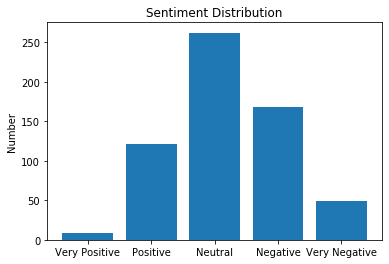

In [8]:
very_pos = df[df["Sentiment"] == 5].iloc[:,0:1].size
pos = df[df["Sentiment"] == 4].iloc[:,0:1].size
neut = df[df["Sentiment"] == 3].iloc[:,0:1].size
neg = df[df["Sentiment"] == 2].iloc[:,0:1].size
very_neg = df[df["Sentiment"] == 1].iloc[:,0:1].size
plt.bar(["Very Positive","Positive","Neutral","Negative","Very Negative"],[very_pos,pos,neut,neg,very_neg])
plt.ylabel("Number")
plt.title("Sentiment Distribution")
plt.show()

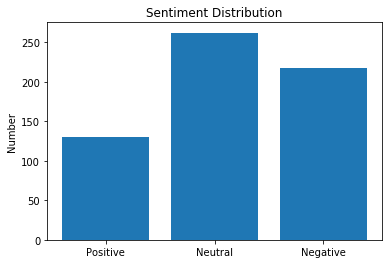

(                                              Comment  Sentiment
 0                 bu da sevin için bir kaç neden biri          4
 1                                  biz biz ol mu bile          3
 2                           insan keza bu kadar yeter          4
 4   sarı saç mavi göz yakışıklı güzel elli geyik a...          3
 5   konu ilgi ol aziz ne in bir masal ve hikaye de...          3
 6   dahi insan alın kişi sadece bir kez bile yeter...          4
 7                                     cumhuriyet kuru          4
 8   tek tek ki ayak adam ve ne zaman rahat dur ki ...          3
 9   kumandan lider unut asla tek insan sene daha s...          4
 10                bu da sevin için bir kaç neden biri          2,
                                               Comment  Sentiment
 0                 bu da sevin için bir kaç neden biri          4
 1                                  biz biz ol mu bile          3
 2                           insan keza bu kadar yeter          4
 4   sarı

In [9]:
df_ternary = df.copy()
df_ternary['Sentiment'] = df_ternary['Sentiment'].map({5: 4, 4: 4,3: 3, 2: 2, 1: 2})

tern_pos = df_ternary[df_ternary["Sentiment"] == 4].iloc[:,0:1].size
tern_neut = df_ternary[df_ternary["Sentiment"] == 3].iloc[:,0:1].size
tern_neg = df_ternary[df_ternary["Sentiment"] == 2].iloc[:,0:1].size

plt.bar(["Positive","Neutral","Negative"],[tern_pos,tern_neut,tern_neg])
plt.ylabel("Number")
plt.title("Sentiment Distribution")
plt.show()
df_ternary.head(10),df.head(10)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words("turkish")

vectorizer = TfidfVectorizer(min_df=3,max_df=0.6,stop_words=stop_words,use_idf=True)
X = vectorizer.fit_transform(df["Comment"]).toarray()
features = vectorizer.get_feature_names()
tfidf_df = pd.DataFrame(np.round(X,3),columns=features)

In [11]:
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X,df_ternary["Sentiment"],test_size = 0.20,random_state=30)
text_train.shape

(487, 326)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs",multi_class="ovr")

classifier.fit(text_train,sent_train)
sent_pred = classifier.predict(text_test)
from sklearn.metrics import accuracy_score

print(accuracy_score(sent_test,sent_pred))

0.47540983606557374


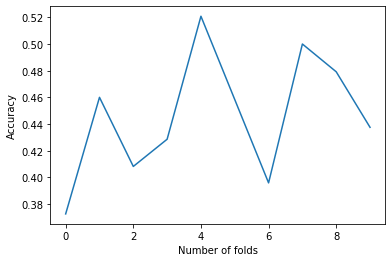

0.4460950380152061


In [13]:
from sklearn.model_selection import cross_val_score
q = cross_val_score(classifier,text_train,sent_train,cv = 10)


plt.plot(np.arange(10),q)
plt.xlabel("Number of folds")
plt.ylabel("Accuracy")
plt.show()

cross_val_score = sum(q) / len(q)
print(cross_val_score)

In [14]:
vectorizer = TfidfVectorizer(min_df=3,max_df=0.6,stop_words=stop_words,use_idf=True)
X = vectorizer.fit_transform(df["Comment"]).toarray()
features = vectorizer.get_feature_names()
tfidf_df = pd.DataFrame(np.round(X,3),columns=features)
tfidf_df.head(8)


,abone,adam,adet,adi,afyon,aka,aksine,aktar,akıl,akşam,...,özel,özgü,özgür,özle,öğret,ülke,üstün,üç,şekli,şikayet
0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0
1,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0
2,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0
3,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.132,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0
4,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0
5,0.0,0.263,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.311,0.0,0.000,0.0,0.0
6,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0
7,0.0,0.171,0.0,0.203,0.203,0.203,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.203,0.0,0.0


In [15]:
text_train, text_test, sent_train, sent_test = train_test_split(X,df["Sentiment"].values.ravel(),test_size = 0.2,random_state=33)


In [16]:
classifier = LogisticRegression(solver="lbfgs",multi_class="ovr")
classifier.fit(text_train,sent_train)

sent_pred = classifier.predict(text_test)
print(accuracy_score(sent_test,sent_pred))

0.4016393442622951


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(text_train,sent_train)

sent_gnn_predict = gnb.predict(text_test)
print(accuracy_score(sent_test,sent_gnn_predict))

0.13114754098360656


In [18]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(text_train,sent_train)

sent_knn_predict = knn.predict(text_test)
print(accuracy_score(sent_test,sent_knn_predict))


0.36885245901639346


In [19]:

from sklearn import tree
dct = tree.DecisionTreeClassifier()
dct.fit(text_train,sent_train)

sent_dct_predict = dct.predict(text_test)
print(accuracy_score(sent_test,sent_dct_predict))

0.4016393442622951


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(text_train,sent_train)

sent_rf_predict = rf.predict(text_test)
print(accuracy_score(sent_test,sent_rf_predict))

0.38524590163934425


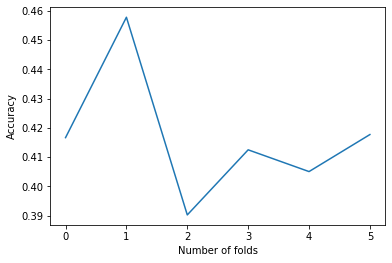

0.4166711174222464


In [21]:
from sklearn.model_selection import cross_val_score
q = cross_val_score(classifier,text_train,sent_train,cv = 6)


plt.plot(np.arange(6),q)
plt.xlabel("Number of folds")
plt.ylabel("Accuracy")
plt.show()


cross_val_score = sum(q) / len(q)
print(cross_val_score)